In [3]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
from scipy import spatial
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})

# Create a folder for storing Publication figures

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure2'


# Set the values for the publication figure parameters
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})
sns.set(font_scale = 1)

In [25]:
# unique_locs_file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point/Analysis/SearchCoverage/SimResults_00__unique_positions.csv'

unique_locs_file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.744_activityTime_750_simType_point/Analysis/SearchCoverage/SimResults_01__unique_positions.csv'
df_unique_pos = pd.read_csv(unique_locs_file)

df_unique_pos

,Unnamed: 0,ID,Time,Hits,Position X,Position Y,Position Z
0,0,0,0.0,12,60.995427,-22.750118,0.0
1,1,1,10.0,17,58.716483,-21.888979,0.0
2,2,2,50.0,34,56.198536,-21.069227,0.0
3,3,3,70.0,46,53.288550,-19.996081,0.0
4,4,4,80.0,69,52.304679,-16.607452,0.0
...,...,...,...,...,...,...,...
1537,1537,1537,366230.0,2,43.997487,27.487061,0.0
1538,1538,1538,371860.0,5,-20.331756,-60.866304,0.0
1539,1539,1539,371900.0,10,-21.783450,-62.319781,0.0
1540,1540,1540,372000.0,1,-23.311090,-63.676748,0.0


In [26]:
# Calculate the convex hull vs time

area = np.zeros(len(df_unique_pos))

for ii in range(3, len(df_unique_pos)):
    
    points_x = df_unique_pos['Position X'][0:ii]
    points_y = df_unique_pos['Position Y'][0:ii]
    
    points_2D = np.vstack((points_x, points_y)).transpose()
    
#     print(np.shape(points_2D))
    
    hull = spatial.ConvexHull(points_2D)
    
    area[ii] = hull.volume

<IPython.core.display.Javascript object>


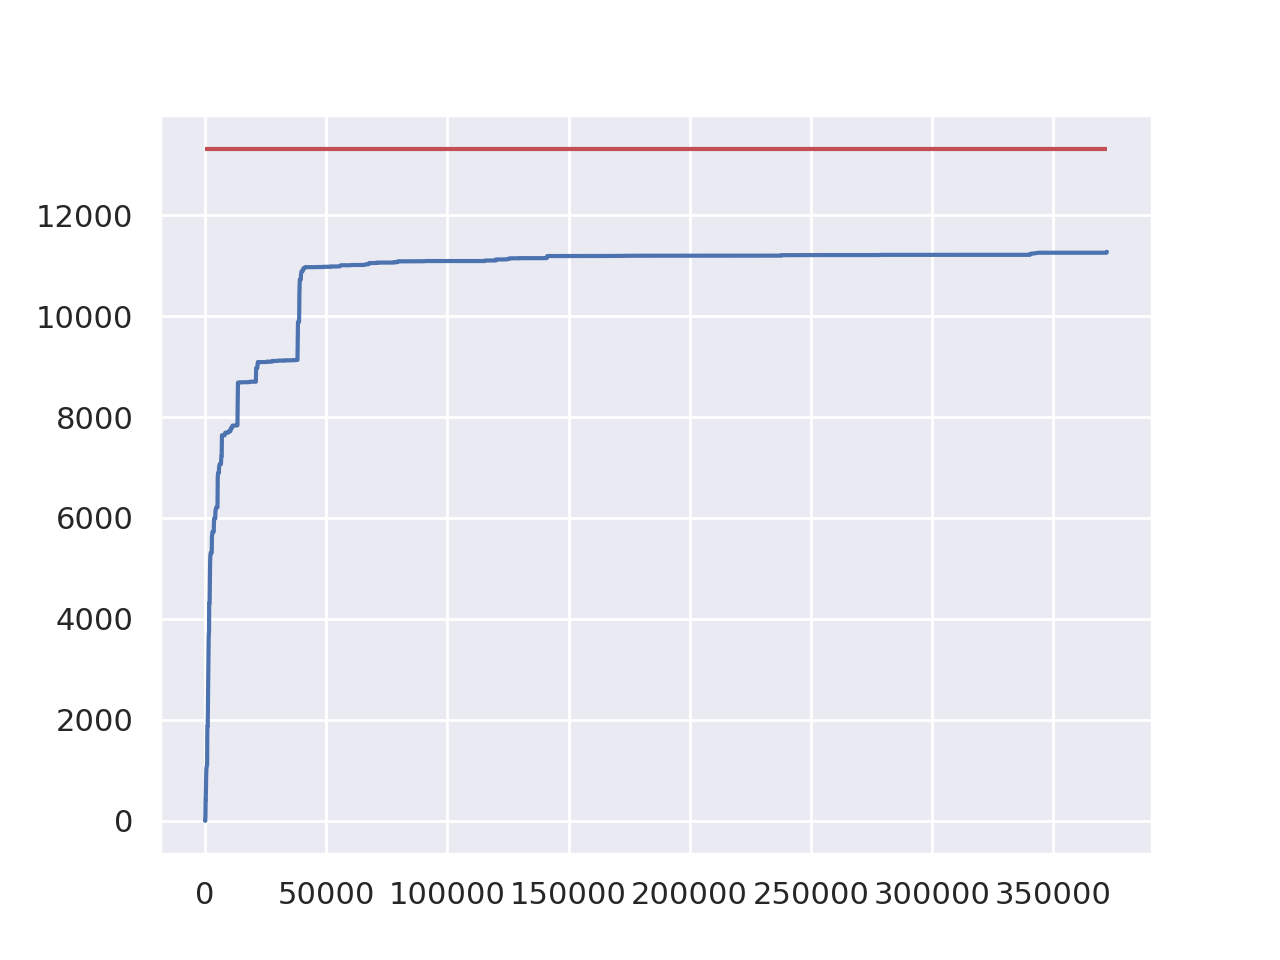

In [28]:
# Plot convex hull area vs time

plt.figure()
plt.plot(df_unique_pos['Time'], area)
plt.hlines((31*2.1)**2*np.pi, 0, max(df_unique_pos['Time']), color = 'r') # Theoretical maximum area available to the filament
plt.show()